<a href="https://colab.research.google.com/github/aadi-29/machinelearning/blob/main/MLPClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn import metrics

In [12]:
df = pd.read_csv('winequality-white.csv', sep=';')
kf = KFold(5,True,1)
feature_set=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
X = df[feature_set]
y = df['quality']
accuracies = {2:[],3:[],4:[],5:[]}
for train,test in kf.split(df):
  X_train, X_test = X.iloc[train], X.iloc[test]
  y_train, y_test = y.iloc[train], y.iloc[test]
  for i in range(2,6):
    clf = MLPClassifier(hidden_layer_sizes=i,activation = 'relu',solver='adam', random_state=40)
    clf.fit(X_train,y_train)
    predicted = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predicted)
    accuracies[i].append(accuracy)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [13]:
for i in accuracies:
  print(i,np.max(accuracies[i])*100)

2 77.04081632653062
3 89.6938775510204
4 64.14708886618999
5 47.49744637385086


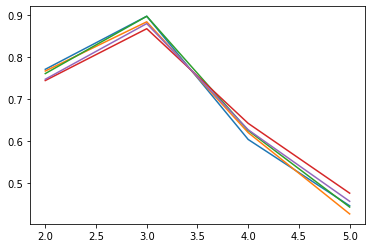

In [17]:
xaxis=list(accuracies.keys())
yaxis = list(accuracies.values())
plt.plot(xaxis,yaxis)
plt.show()